# Unsupervised Learning: Trade&Ahead

**Marks: 60**

By: Glen A. Patterson

Date: 7/31/2023

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- **Ticker Symbol:** An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- **Company:** Name of the company
- **GICS Sector:** The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- **GICS Sub Industry:** The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- **Current Price:** Current stock price in dollars
- **Price Change:** Percentage change in the stock price in 13 weeks
- **Volatility:** Standard deviation of the stock price over the past 13 weeks
- **ROE:** A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- **Cash Ratio:** The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- **Net Cash Flow:** The difference between a company's cash inflows and outflows (in dollars)
- **Net Income:** Revenues minus expenses, interest, and taxes (in dollars)
- **Earnings Per Share:** Company's net profit divided by the number of common shares it has outstanding (in dollars)
- **Estimated Shares Outstanding:** Company's stock currently held by all its shareholders
- **P/E Ratio:** Ratio of the company's current stock price to the earnings per share 
- **P/B Ratio:** Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically
%load_ext nb_black

# Libraries to help read, save, and manipulate data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline
sns.set()

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 300)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# to compute distances
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
# Load the .csv stock file and call the dataframe "StockData"
StockData = pd.read_csv("stock_data.csv")

<IPython.core.display.Javascript object>

In [3]:
# Make a copy of original dataframe "StockData" and call it "data".  We will be modifying this dataframe
data = StockData.copy()

<IPython.core.display.Javascript object>

In [4]:
# Observing the head of the first 10 rows of the dataset to make sure it loaded correctly and examine the data.
data.head(10)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810
5,ADM,Archer-Daniels-Midland Co,Consumer Staples,Agricultural Products,36.680000,-12.017268,1.516493,10,49,-189000000,1849000000,2.99,6.183946e+08,12.267559,7.496831
6,ADS,Alliance Data Systems,Information Technology,Data Processing & Outsourced Services,276.570007,6.189286,1.116976,30,25,90885000,596541000,8.91,6.695185e+07,31.040405,129.064585
7,AEE,Ameren Corp,Utilities,MultiUtilities,43.230000,2.174424,1.124186,9,14,287000000,636000000,2.60,2.446154e+08,16.626923,-0.719497
8,AEP,American Electric Power,Utilities,Electric Utilities,58.270000,2.371753,1.068485,11,9,13900000,2052300000,3.13,4.218978e+08,18.456543,-3.022649
9,AFL,AFLAC Inc,Financials,Life & Health Insurance,59.900002,3.027181,1.048295,14,99,-308000000,2533000000,5.88,4.307823e+08,10.187075,-1.883912


<IPython.core.display.Javascript object>

In [5]:
# Get information about the number of rows and columns in the dataset (rows, columns)
data.shape

(340, 15)

<IPython.core.display.Javascript object>

- We can see that there is 340 rows and 15 columns

In [6]:
# See if there is any duplicated rows
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There is no duplicated rows in dataset.

In [7]:
# Information on dataset (data types, format, missing data, ect.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

<IPython.core.display.Javascript object>

- There is no missing data in this dataset
- There is 40.0 KB memory used
- There is seven "float64", four "int64", and four "object" data types

In [8]:
# Explore the Statistics in data and look for outliers in dataset
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Univariate analysis:

In [9]:
# function to create labeled barplots
def labeled_barplot(data, feature, figuresize=3, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, figuresize * 6))
    else:
        plt.figure(figsize=(n + 2, figuresize * 6))

    plt.xticks(rotation=90, fontsize=figuresize * 16)
    plt.yticks(fontsize=figuresize * 16)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=25,
            xytext=(0, 10),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


# This is a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

#### Observation on GICS Sector:

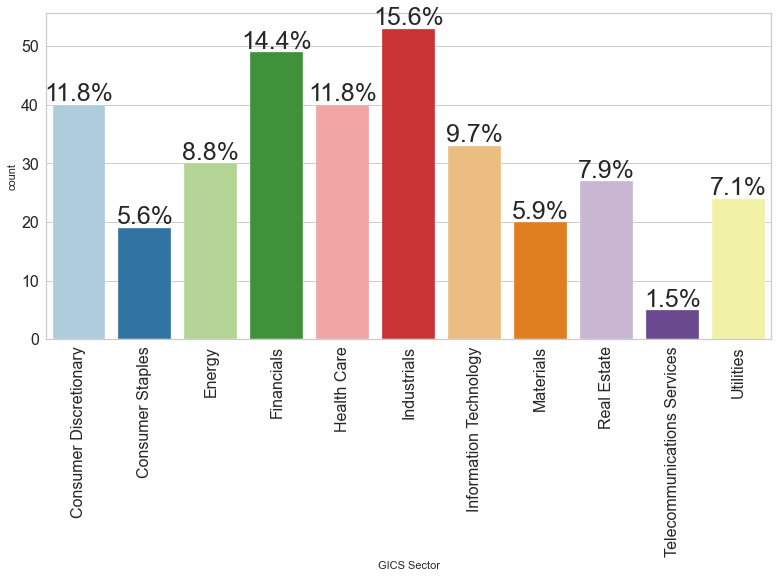

<IPython.core.display.Javascript object>

In [10]:
labeled_barplot(data, "GICS Sector", figuresize=1, perc=True)

- 15.6% of the stock dataset is in Industrials
- 14.4% of the stock dataset is in Financials
- 11.8% of the stock dataset is in Consumer Discretionary
- 11.8% of the stock dataset is in Health Care
- 9.7% of the stock dataset is in Information Technology
- 8.8% of the stock dataset is in Energy
- 7.9% of the stock dataset is in Real Estate
- 7.1% of the stock dataset is in Utilites
- 5.9% of the stock dataset is in Materials
- 5.6% of the stock dataset is in Consumer Staples
- 1.5% of the stock dataset is in Telecommunications Services

#### Observation on GICS Sub Industry:

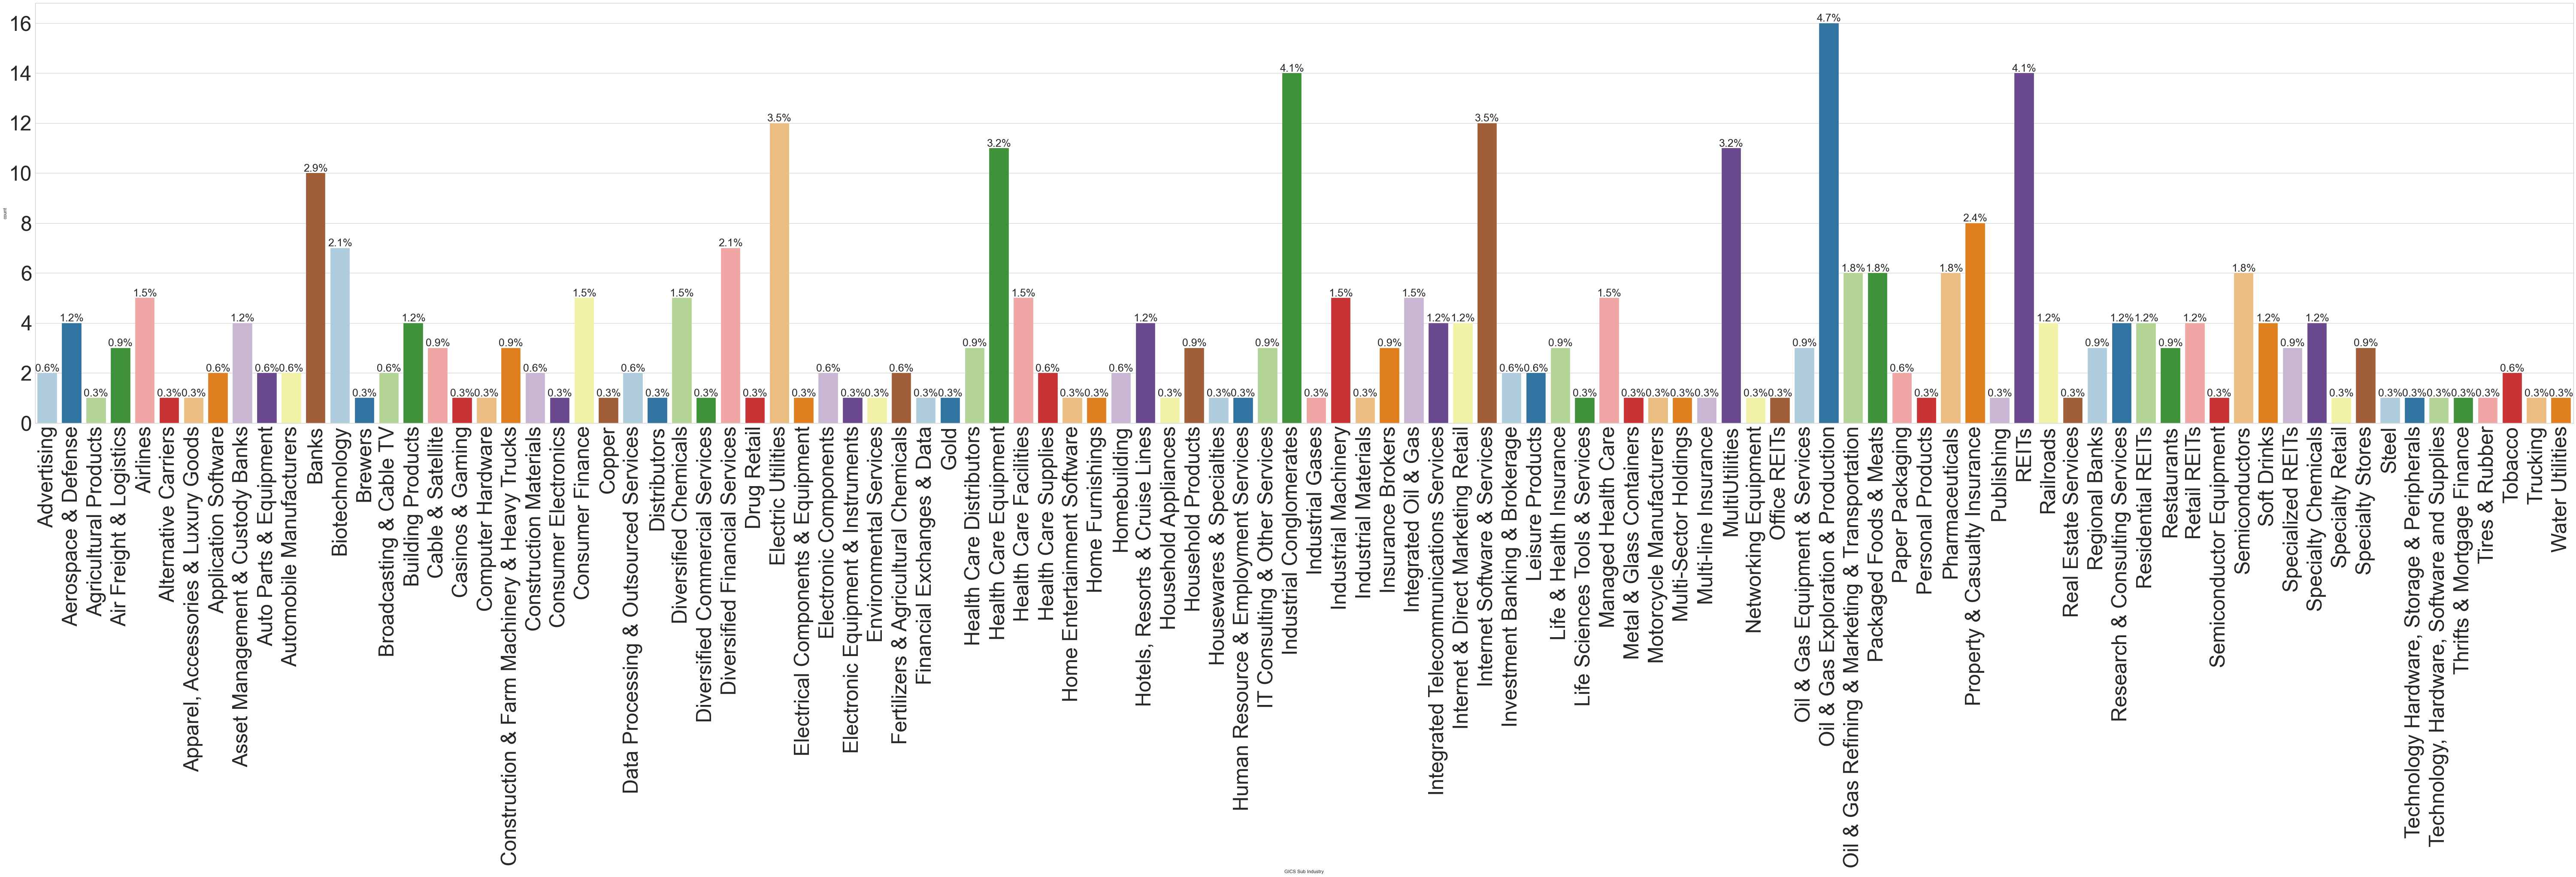

<IPython.core.display.Javascript object>

In [11]:
labeled_barplot(data, "GICS Sub Industry", figuresize=3, perc=True)

- 4.7% of the stock dataset is in Sub-Industry Oil & Gas Exploration & Production (The largest Sub-Industry in dataset)

#### Observation on Current Price:

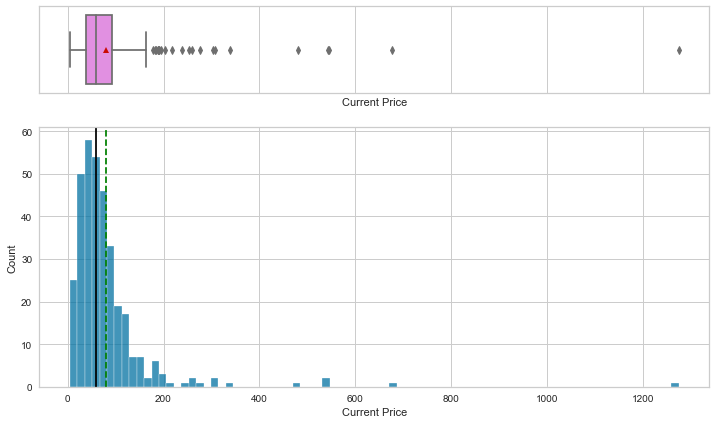

<IPython.core.display.Javascript object>

In [12]:
histogram_boxplot(data, "Current Price")

- The Median Current Price is 59.71, the lowest Current Price is 4.50 and the highest Current Price is 1,274.95
- The Current Price IQR is between 38.56 and 92.88 with a mean of 80.86
- There is many outliers in Current Price in stock market
- Current Price histogram is right skewed

#### Question 1:  What does the distribution of stock prices look like?  

- **The distribution of Stock Prices is right skewed with many outliers**

#### Observation on Price Change:

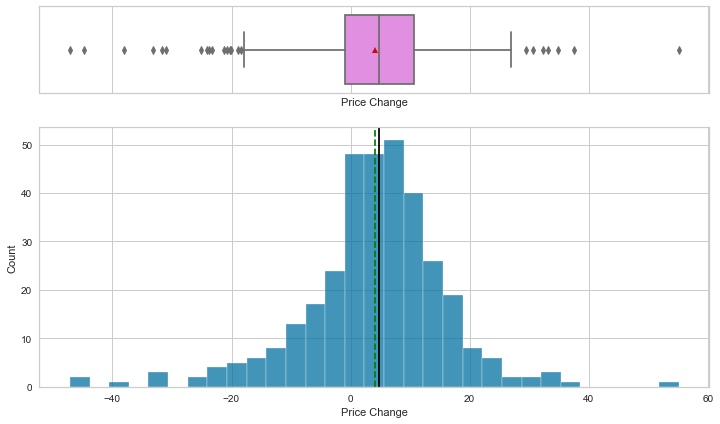

<IPython.core.display.Javascript object>

In [13]:
histogram_boxplot(data, "Price Change")

- The Median Price Change is 4.82, the lowest Price Change is -47.13 and the highest Price Change is 55.05
- The Price Change IQR is between -0.94 and 10.70 with a mean of 4.08
- There is many outliers in Price Change in stock market

#### Observation on Volatility:

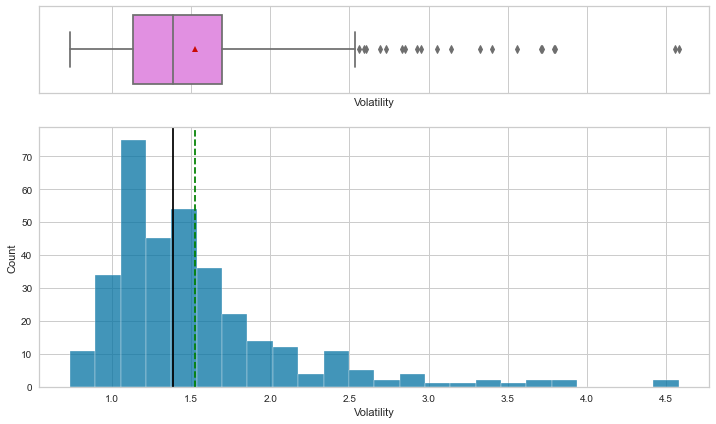

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(data, "Volatility")

- The Median Volatility is 1.39, the lowest Volatility is 0.73 and the highest Volatility is 4.58
- The Volatility IQR is between 1.13 and 1.70 with a mean of 1.53
- There is many outliers in Volatility in stock market
- Volatility histogram is right skewed

#### Observation on ROE:

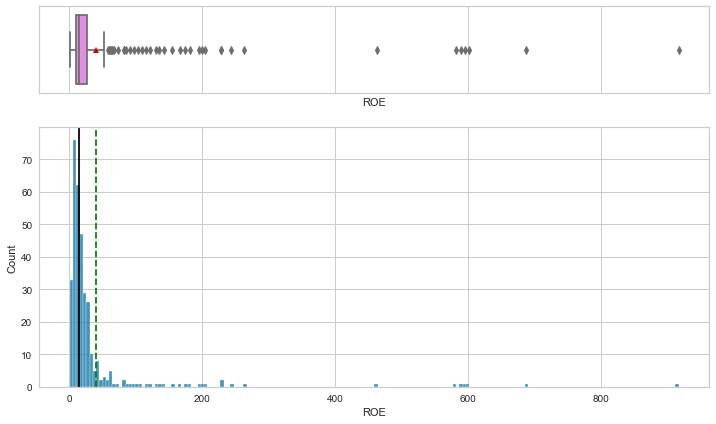

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(data, "ROE")

- The Median ROE is 15.00, the lowest ROE is 1.00 and the highest ROE is 917.00
- The ROE IQR is between 9.75 and 27.00 with a mean of 39.60
- There is many outliers in ROE in stock market
- ROE histogram is right skewed

#### Observation on Cash Ratio:

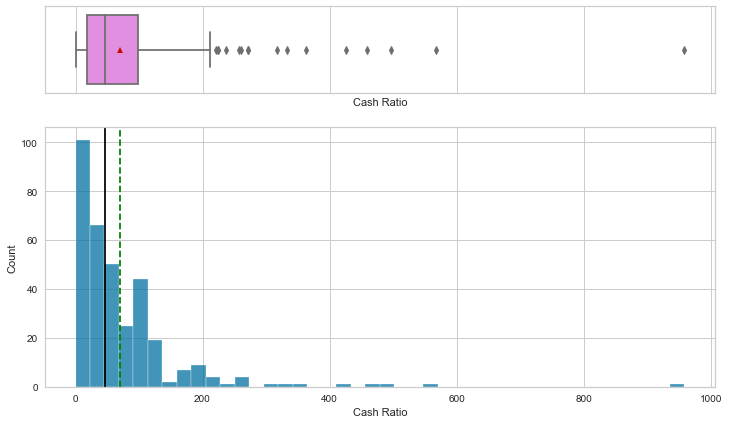

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(data, "Cash Ratio")

- The Median Cash Ratio is 47.00, the lowest Cash Ratio is 0.00 and the highest Cash Ratio is 958.00
- The Cash Ratio IQR is between 18.00 and 99.00 with a mean of 70.02
- There is many outliers in Cash Ratio in stock market
- Cash Ratio histogram is right skewed

#### Observation on Net Cash Flow:

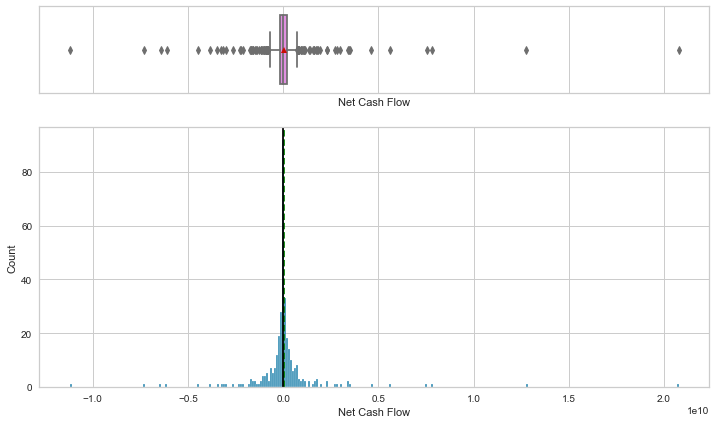

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(data, "Net Cash Flow")

- The Median Net Cash Flow is 2,098,000.00, the lowest Net Cash Flow is -11,208,000,000 and the highest Net Cash Flow is 20,764,000,000
- The Net Cash Flow IQR is between -193,906,500 and 169,810,750 with a mean of 55,537,621
- There is many outliers in Net Cash Flow in stock market

#### Observation on Net Income:

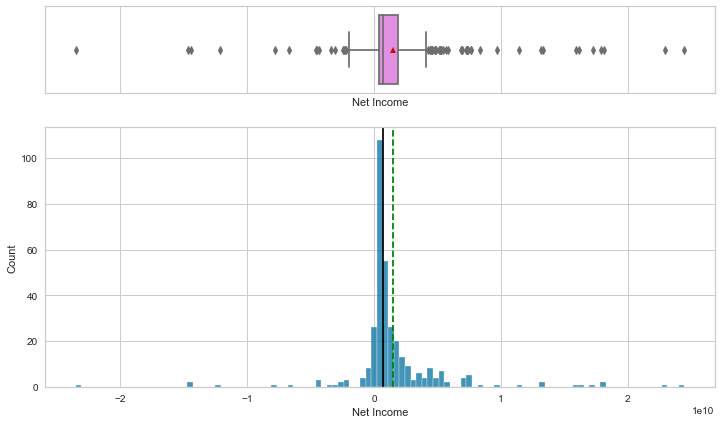

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(data, "Net Income")

- The Median Net Income is 707,336,000.00, the lowest Net Income is -23,528,000,000 and the highest Net Income is 24,442,000,000
- The Net Income IQR is between 352,301,250 and 1,899,000,000 with a mean of 1,494,384,603
- There is many outliers in Net Income in stock market

#### Observation on Earnings Per Share:

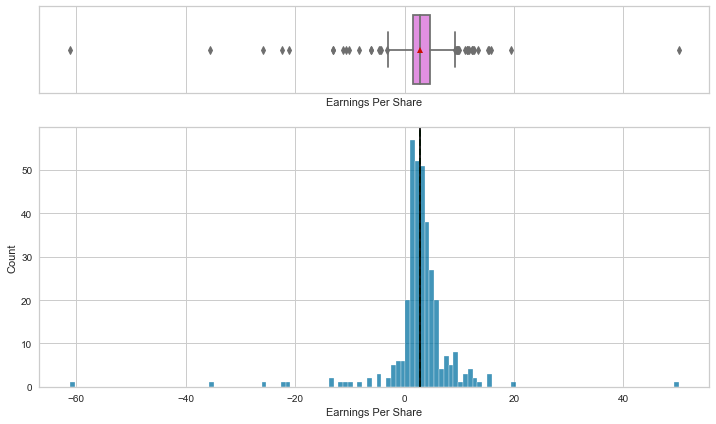

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(data, "Earnings Per Share")

- The Median Earnings Per Share is 2.90, the lowest Earnings Per Share is -61.20 and the highest Earnings Per Share is 50.09
- The Earnings Per Share IQR is between 1.56 and 4.62 with a mean of 2.78
- There is many outliers in Earnings Per Share in stock market

#### Observation on Estimated Shares Outstanding:

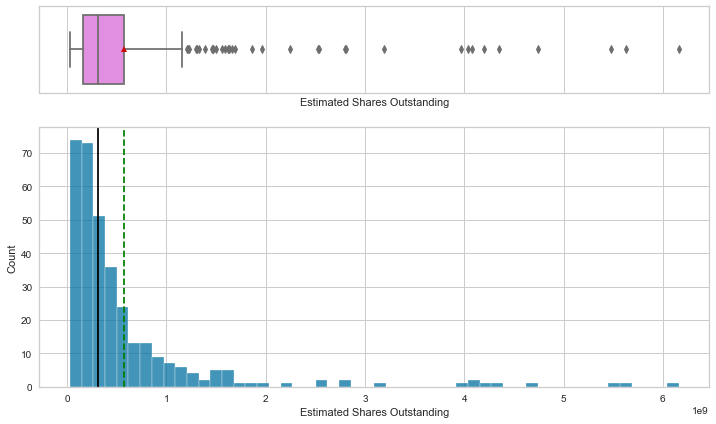

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(data, "Estimated Shares Outstanding")

- The Median Estimated Shares Outstanding is 309,675,138.0, the lowest Estimated Shares Outstanding is 27,672,157 and the highest Estimated Shares Outstanding is 6,159,292,035
- The Estimated Shares Outstanding IQR is between 158,848,216 and 573,117,457 with a mean of 577,028,338
- There is many outliers in Estimated Shares Outstanding in stock market
- Estimated Shares Outstanding histogram is right skewed

#### Observation on P/E Ratio:

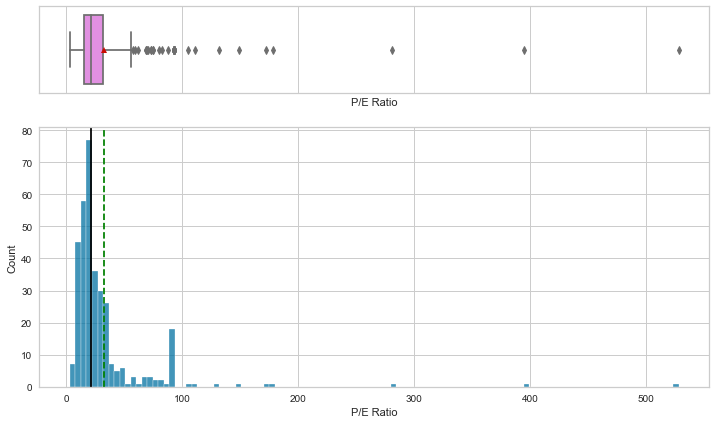

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(data, "P/E Ratio")

- The Median P/E Ratio is 20.82, the lowest P/E Ratio is 2.94 and the highest P/E Ratio is 528.04
- The P/E Ratio IQR is between 15.04 and 31.76 with a mean of 32.61
- There is many outliers in P/E Ratio in stock market
- P/E Ratio histogram is right skewed

#### Observation on P/B Ratio:

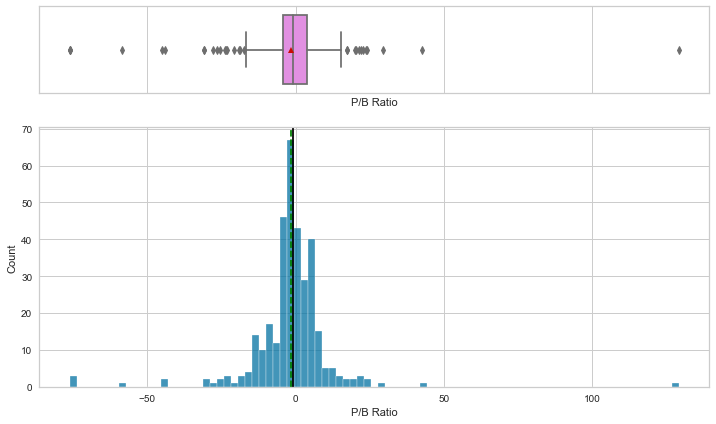

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(data, "P/B Ratio")

- The Median P/B Ratio is -1.07, the lowest P/B Ratio is -76.12 and the highest P/B Ratio is 129.06
- The P/B Ratio IQR is between -4.35 and 3.92 with a mean of -1.72
- There is many outliers in P/B Ratio in stock market

### Bivariate Analysis

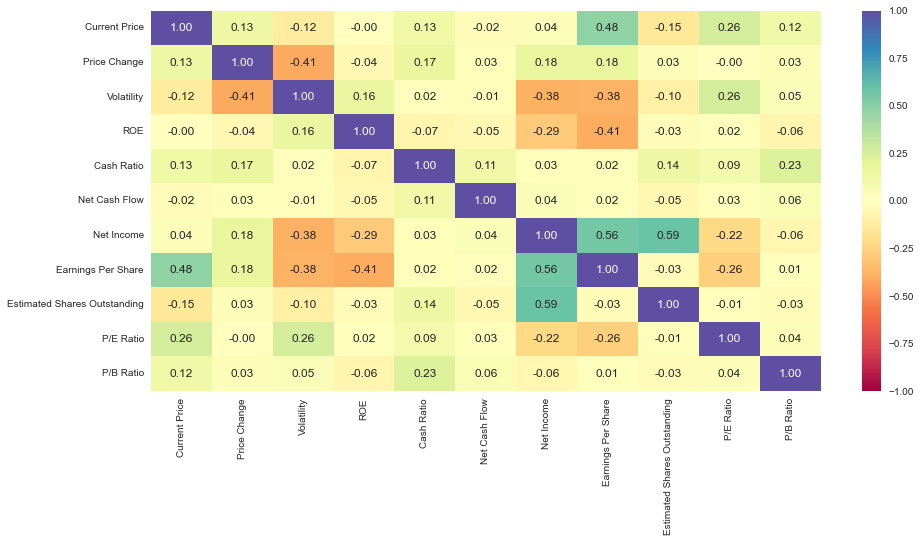

<IPython.core.display.Javascript object>

In [23]:
# creating the heatmap of the dataset
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Question 3:  How are the different variables correlated with each other?

**Observations:**

- There is a strong positive correlation between Net Income and Estimated Shares Outstanding
- There is a strong positive correlation between Net Income and Earnings Per Share
- There is a strong positive correlation between Current Price and Earnings Per Share
- There is a positive correlation between Current Price and P/E Ratio
- There is a positive correlation between Volatility and P/E Ratio
- There is a positive correlation between Cash Ratio and P/B Ratio
- There is a strong negitive correlation between ROE and Earnings Per Share
- There is a strong negitive correlation between Price Change and Volatility
- There is a negitive correlation between Volatility and Net Income
- There is a negitive correlation between Volatility and Earnings Per Share
- There is a negitive correlation between ROE and Net Income
- There is a negitive correlation between P/E Ratio and Net Income
- There is a negitive correlation between P/E Ratio and Earnings Per Share

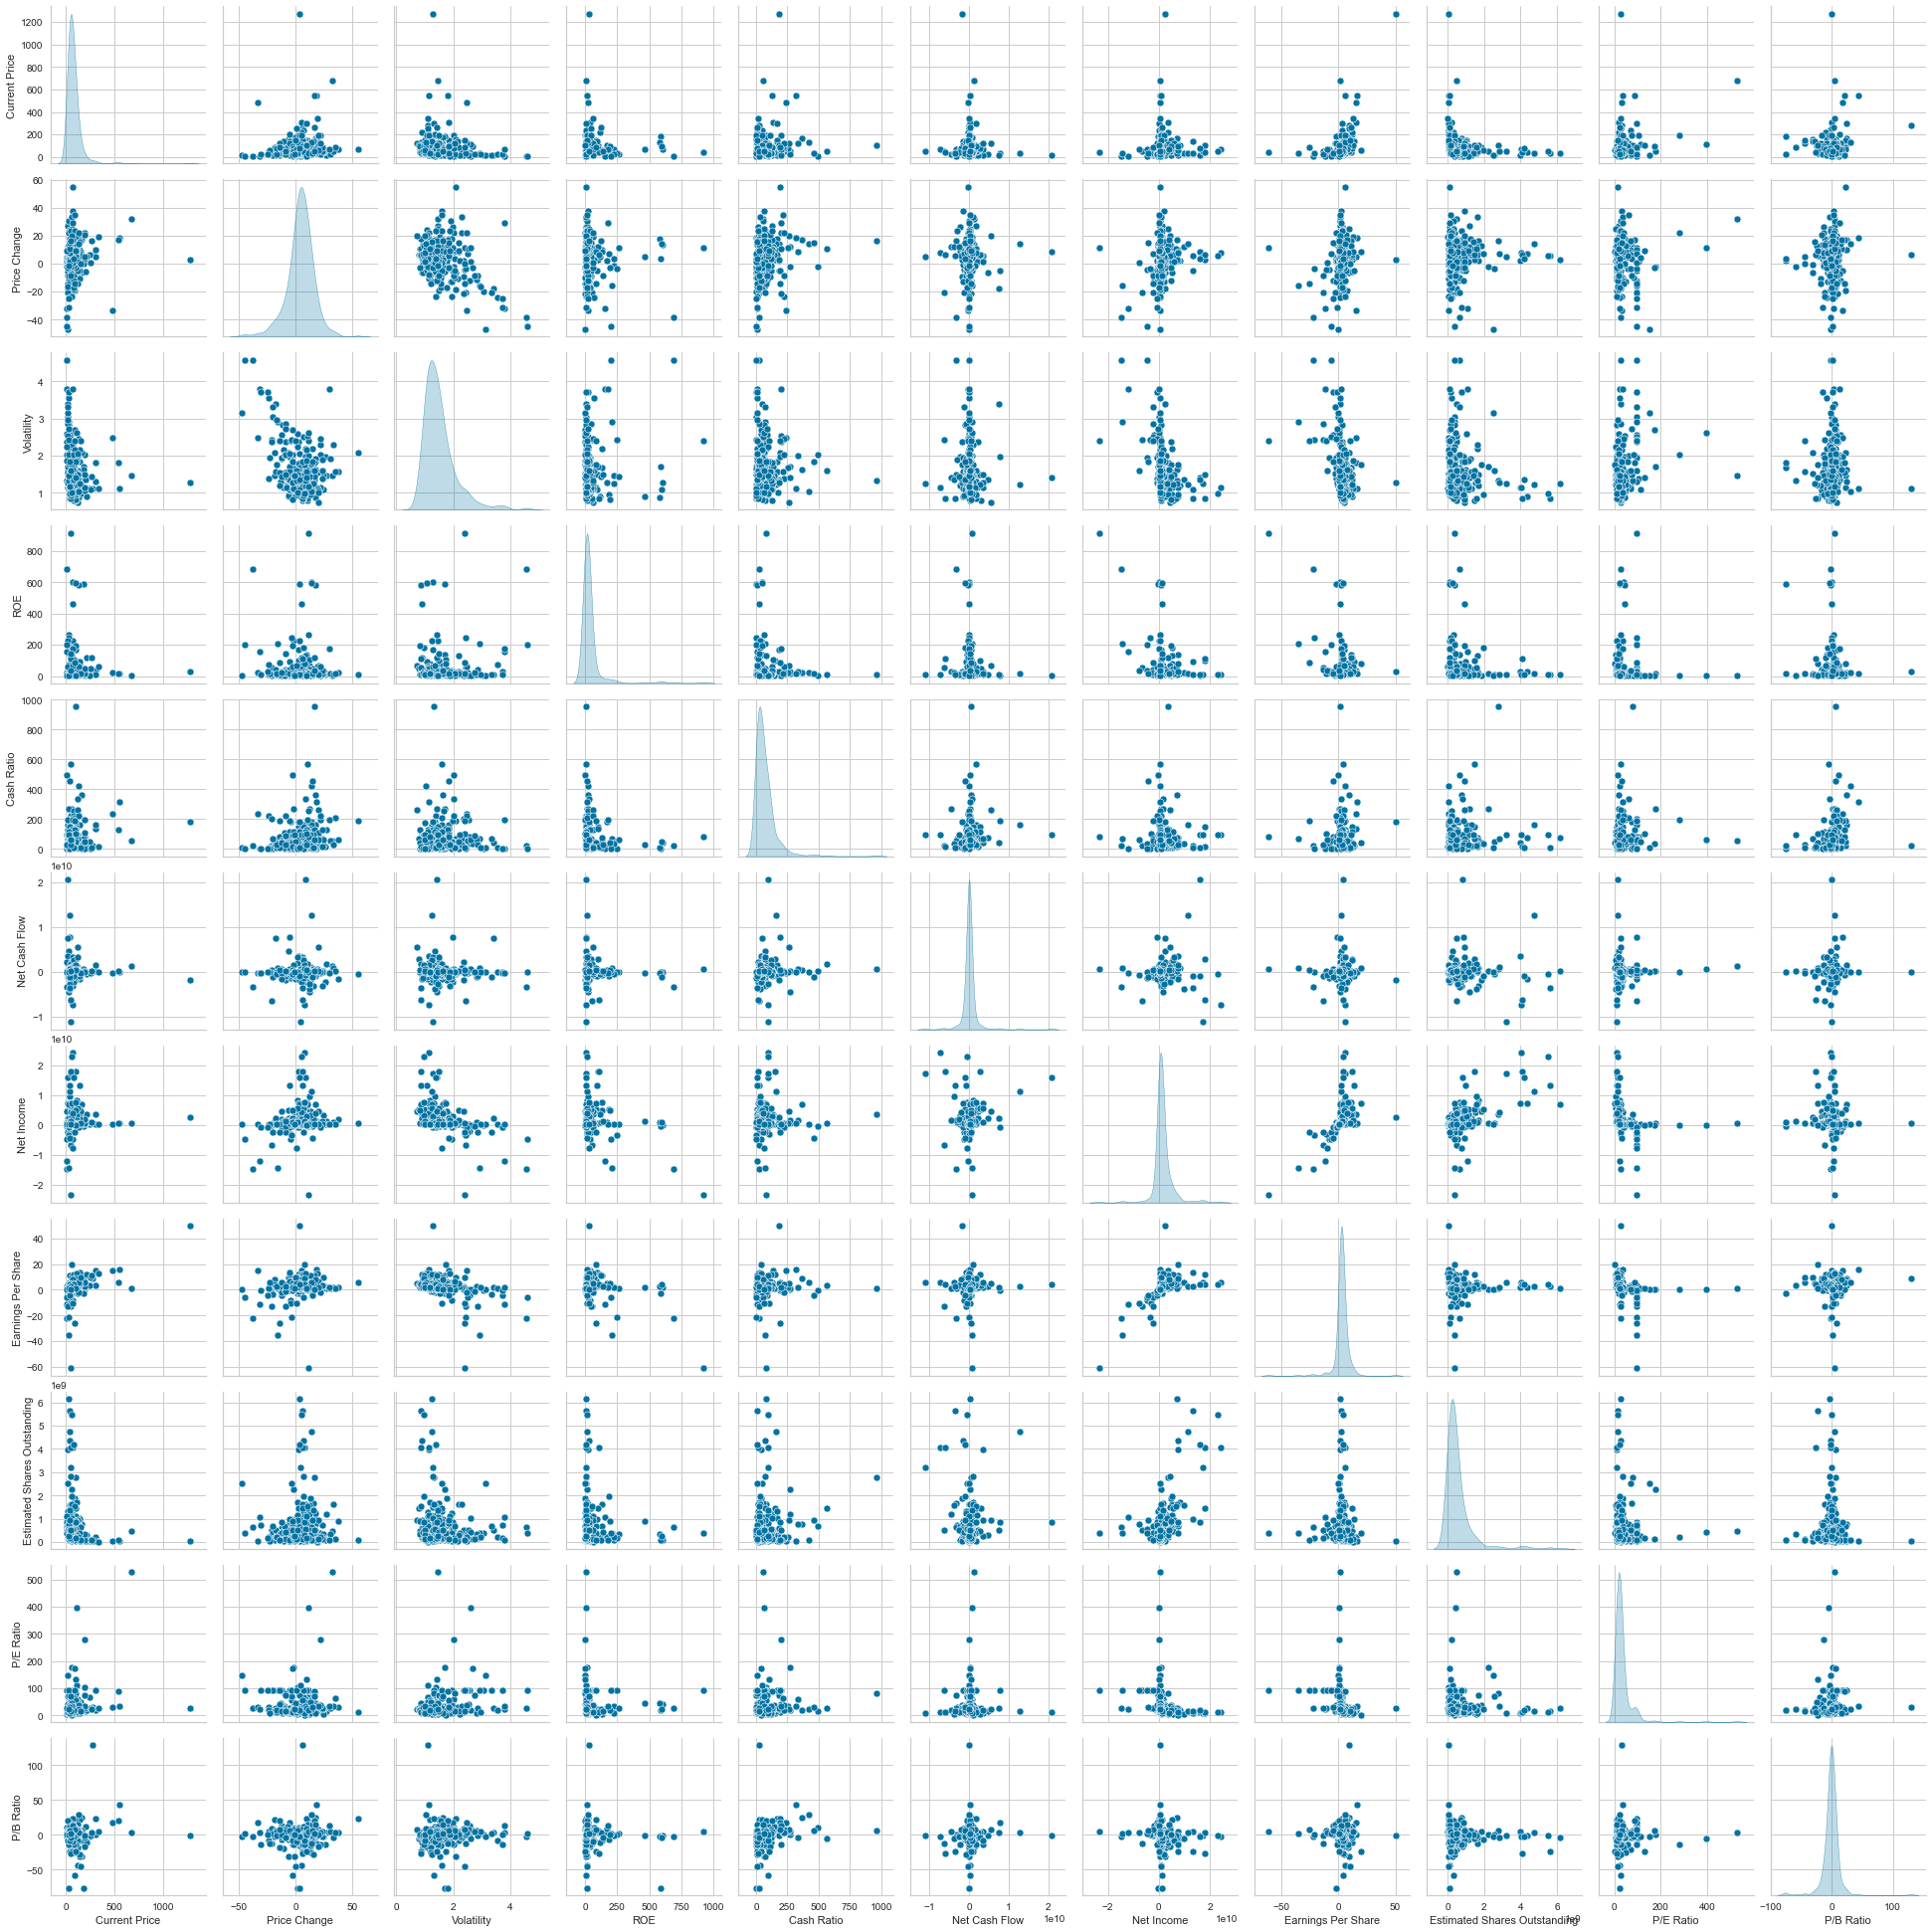

<IPython.core.display.Javascript object>

In [24]:
# creating the pairplot of the dataset
sns.pairplot(data=data, diag_kind="kde")
plt.show()

In [25]:
# function to plot boxplot chart
def barplot_chart(data_chart, x_axis, y_axis, x_rotation=90, figuresize=12):
    plt.figure(figsize=(15, 7))
    sns.barplot(data=data_chart, x=x_axis, y=y_axis, ci=False)
    plt.xticks(rotation=x_rotation, fontsize=figuresize)
    plt.show()

<IPython.core.display.Javascript object>

#### Question 2:  The stocks of which economic sector have seen the maximum price increase on average?

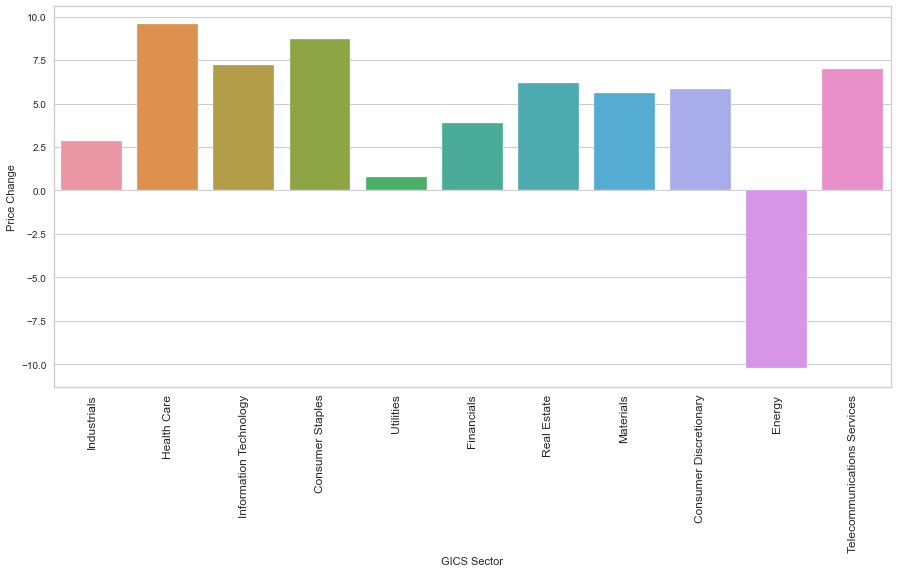

<IPython.core.display.Javascript object>

In [26]:
barplot_chart(data, "GICS Sector", "Price Change")

In [27]:
# Average Price change in the Health Care Sector
data[data["GICS Sector"] == "Health Care"]["Price Change"].mean()

9.585651574425

<IPython.core.display.Javascript object>

In [28]:
# Average Price change in the Consumer Staples Sector
data[data["GICS Sector"] == "Consumer Staples"]["Price Change"].mean()

8.684750360473684

<IPython.core.display.Javascript object>

In [29]:
# Average Price change in the Energy Sector
data[data["GICS Sector"] == "Energy"]["Price Change"].mean()

-10.228288733833335

<IPython.core.display.Javascript object>

- **The stocks of the Health Care sector have seen the maximum price increase on average (Avg Price Change = 9.6)**
- The next best stock sector is Consumer Staples (Avg Price Change = 8.7)
- The worst stock sector is Energy (Avg Price Change = -10.2)

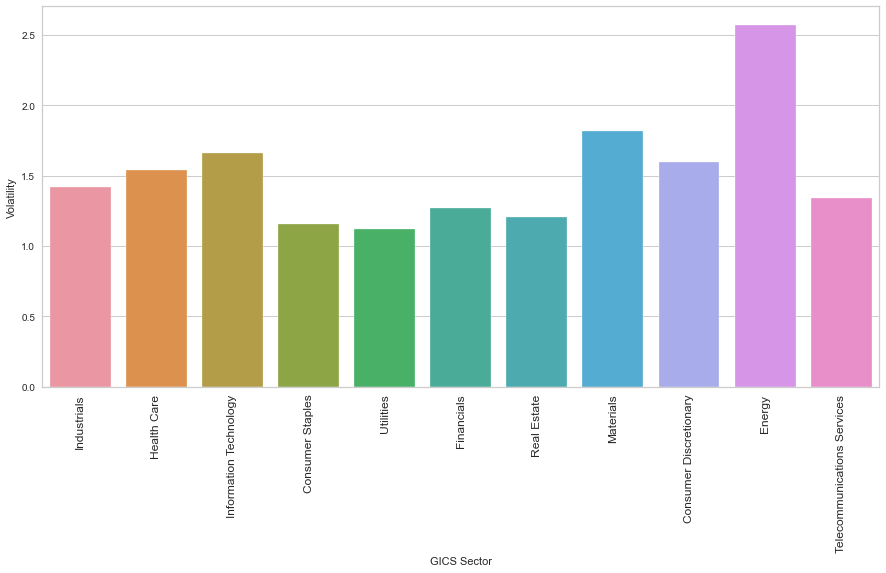

<IPython.core.display.Javascript object>

In [30]:
barplot_chart(data, "GICS Sector", "Volatility")

In [31]:
# Average Volatility in the Energy Sector
data[data["GICS Sector"] == "Energy"]["Volatility"].mean()

2.568776599966666

<IPython.core.display.Javascript object>

- **The largest Volatility is in the Energy Sector** (The Sector also has the highest negitive price change)

#### Question 4:  Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

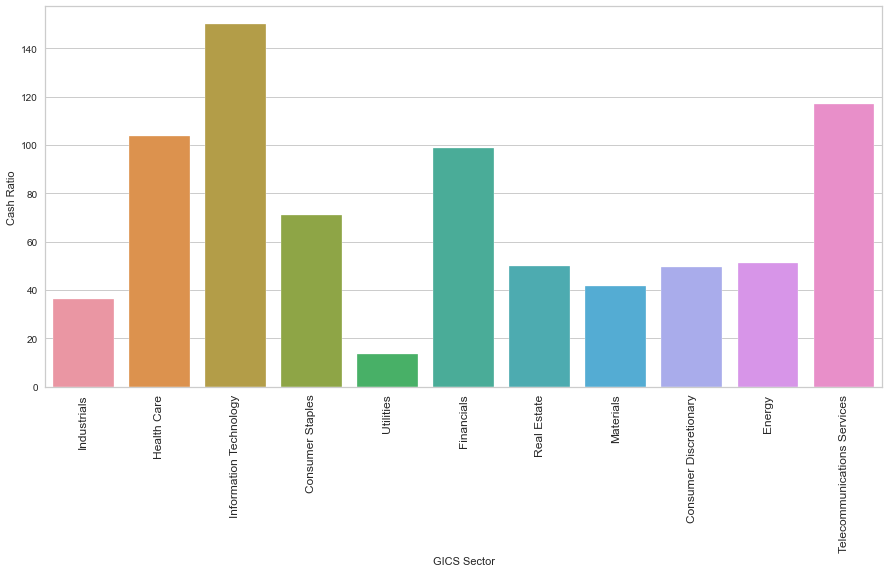

<IPython.core.display.Javascript object>

In [32]:
barplot_chart(data, "GICS Sector", "Cash Ratio")

In [33]:
# Average Cash Ratio in the Information Technology Sector
data[data["GICS Sector"] == "Information Technology"]["Cash Ratio"].mean()

149.8181818181818

<IPython.core.display.Javascript object>

- **Information Technology Sector has the largest Cash Ratio over any other Sector** (Avg Cash Ratio = 149.82)

#### Question 5:  P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

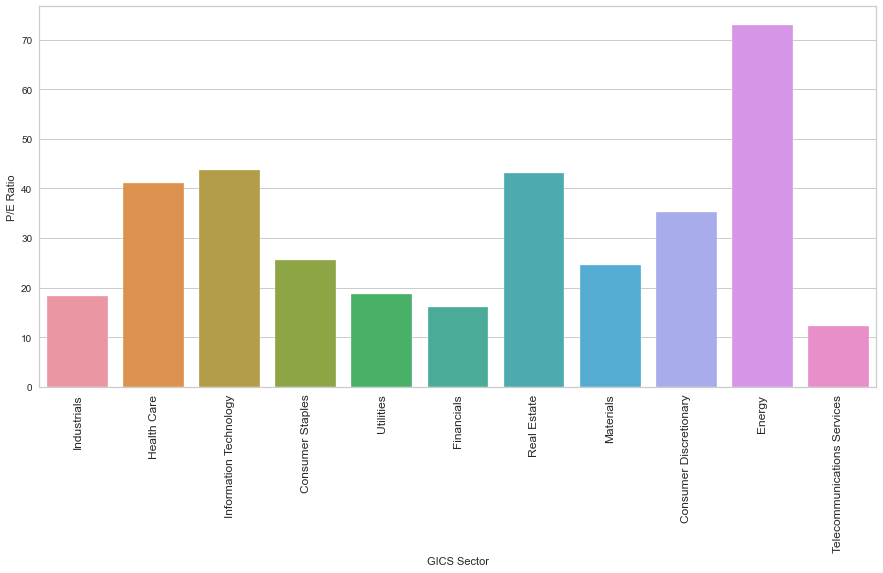

<IPython.core.display.Javascript object>

In [34]:
barplot_chart(data, "GICS Sector", "P/E Ratio")

In [35]:
# Average P/E Ratio in the Energy Sector
data[data["GICS Sector"] == "Energy"]["P/E Ratio"].mean()

72.89770862009999

<IPython.core.display.Javascript object>

- **Energy Sector has the largest P/E Ratio over any other Sector** (Avg P/E Ratio = 72.90)

## Insights based on EDA:

- 15.6% of the stock dataset is in Industrials
- 14.4% of the stock dataset is in Financials
- 11.8% of the stock dataset is in Consumer Discretionary
- 11.8% of the stock dataset is in Health Care
- 9.7% of the stock dataset is in Information Technology
- 8.8% of the stock dataset is in Energy
- 7.9% of the stock dataset is in Real Estate
- 7.1% of the stock dataset is in Utilites
- 5.9% of the stock dataset is in Materials
- 5.6% of the stock dataset is in Consumer Staples
- 1.5% of the stock dataset is in Telecommunications Services
- 4.7% of the stock dataset is in Sub-Industry Oil & Gas Exploration & Production (The largest Sub-Industry in dataset)
- The Median Current Price is 59.71, the lowest Current Price is 4.50 and the highest Current Price is 1,274.95
- The Current Price IQR is between 38.56 and 92.88 with a mean of 80.86
- There is many outliers in Current Price in stock market
- Current Price histogram is right skewed
- The Median Price Change is 4.82, the lowest Price Change is -47.13 and the highest Price Change is 55.05
- The Price Change IQR is between -0.94 and 10.70 with a mean of 4.08
- There is many outliers in Price Change in stock market
- The Median Volatility is 1.39, the lowest Volatility is 0.73 and the highest Volatility is 4.58
- The Volatility IQR is between 1.13 and 1.70 with a mean of 1.53
- There is many outliers in Volatility in stock market
- Volatility histogram is right skewed
- The Median ROE is 15.00, the lowest ROE is 1.00 and the highest ROE is 917.00
- The ROE IQR is between 9.75 and 27.00 with a mean of 39.60
- There is many outliers in ROE in stock market
- ROE histogram is right skewed
- The Median Cash Ratio is 47.00, the lowest Cash Ratio is 0.00 and the highest Cash Ratio is 958.00
- The Cash Ratio IQR is between 18.00 and 99.00 with a mean of 70.02
- There is many outliers in Cash Ratio in stock market
- Cash Ratio histogram is right skewed
- The Median Net Cash Flow is 2,098,000.00, the lowest Net Cash Flow is -11,208,000,000 and the highest Net Cash Flow is 20,764,000,000
- The Net Cash Flow IQR is between -193,906,500 and 169,810,750 with a mean of 55,537,621
- There is many outliers in Net Cash Flow in stock market
- The Median Net Income is 707,336,000.00, the lowest Net Income is -23,528,000,000 and the highest Net Income is 24,442,000,000
- The Net Income IQR is between 352,301,250 and 1,899,000,000 with a mean of 1,494,384,603
- There is many outliers in Net Income in stock market
- The Median Earnings Per Share is 2.90, the lowest Earnings Per Share is -61.20 and the highest Earnings Per Share is 50.09
- The Earnings Per Share IQR is between 1.56 and 4.62 with a mean of 2.78
- There is many outliers in Earnings Per Share in stock market
- The Median Estimated Shares Outstanding is 309,675,138.0, the lowest Estimated Shares Outstanding is 27,672,157 and the highest Estimated Shares Outstanding is 6,159,292,035
- The Estimated Shares Outstanding IQR is between 158,848,216 and 573,117,457 with a mean of 577,028,338
- There is many outliers in Estimated Shares Outstanding in stock market
- Estimated Shares Outstanding histogram is right skewed
- The Median P/E Ratio is 20.82, the lowest P/E Ratio is 2.94 and the highest P/E Ratio is 528.04
- The P/E Ratio IQR is between 15.04 and 31.76 with a mean of 32.61
- There is many outliers in P/E Ratio in stock market
- P/E Ratio histogram is right skewed
- The Median P/B Ratio is -1.07, the lowest P/B Ratio is -76.12 and the highest P/B Ratio is 129.06
- The P/B Ratio IQR is between -4.35 and 3.92 with a mean of -1.72
- There is many outliers in P/B Ratio in stock market
- There is a strong positive correlation between Net Income and Estimated Shares Outstanding
- There is a strong positive correlation between Net Income and Earnings Per Share
- There is a strong positive correlation between Current Price and Earnings Per Share
- There is a positive correlation between Current Price and P/E Ratio
- There is a positive correlation between Volatility and P/E Ratio
- There is a positive correlation between Cash Ratio and P/B Ratio
- There is a strong negitive correlation between ROE and Earnings Per Share
- There is a strong negitive correlation between Price Change and Volatility
- There is a negitive correlation between Volatility and Net Income
- There is a negitive correlation between Volatility and Earnings Per Share
- There is a negitive correlation between ROE and Net Income
- There is a negitive correlation between P/E Ratio and Net Income
- There is a negitive correlation between P/E Ratio and Earnings Per Share
- The stocks of the Health Care sector have seen the maximum price increase on average (Avg Price Change = 9.6)
- The next best stock sector is Consumer Staples (Avg Price Change = 8.7)
- The worst stock sector is Energy (Avg Price Change = -10.2)
- The largest Volatility is in the Energy Sector (The Sector also has the highest negitive price change)
- Information Technology Sector has the largest Cash Ratio over any other Sector (Avg Cash Ratio = 149.82)
- Energy Sector has the largest P/E Ratio over any other Sector (Avg P/E Ratio = 72.90)

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

- **There is no Duplicate values**
- **There is no Missing values**
- **Outlier are not treated as all values are possible**

In [36]:
# Creating a copy of all values in "data" and call it "df"
df = data.iloc[:, 4:]
df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


<IPython.core.display.Javascript object>

In [37]:
# convert dataset of each column to the same scale (zscore) and called df_Scaled
df_Scaled = df.apply(zscore)
df_Scaled.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


<IPython.core.display.Javascript object>

## EDA

- It is a good idea to explore the data once again after manipulating it.

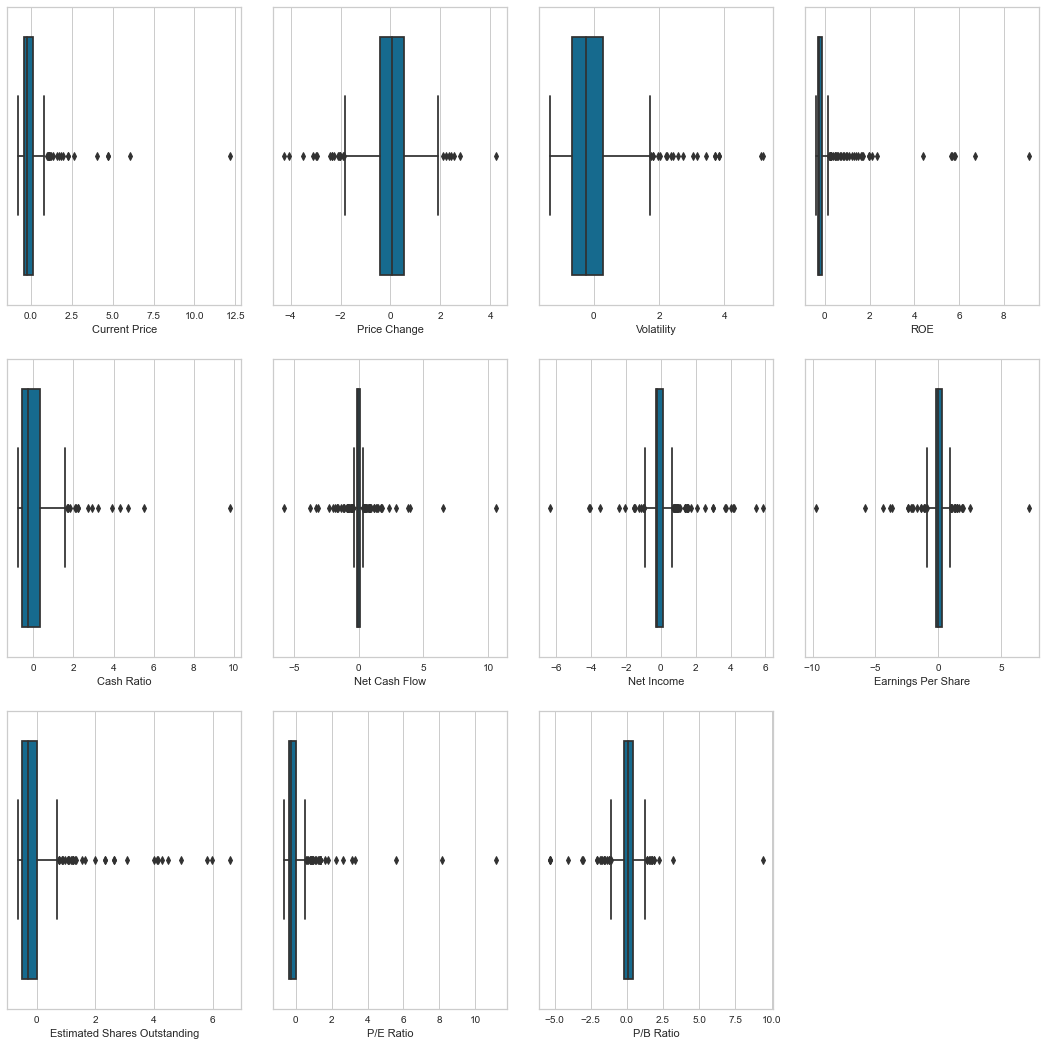

<IPython.core.display.Javascript object>

In [38]:
# EDA after manipulating the datset
num_cols = df_Scaled.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df_Scaled, x=variable)
    plt.tight_layout(pad=2)

plt.show()

- **Only the Scaling was change after manipulating the data.**

## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.176396791566185
Number of Clusters: 5 	Average Distortion: 2.140142891213095
Number of Clusters: 6 	Average Distortion: 2.0620766712698435
Number of Clusters: 7 	Average Distortion: 2.036959206181935
Number of Clusters: 8 	Average Distortion: 1.9744635725476796
Number of Clusters: 9 	Average Distortion: 1.9419732651540267
Number of Clusters: 10 	Average Distortion: 1.8536870442165772
Number of Clusters: 11 	Average Distortion: 1.799571508606465
Number of Clusters: 12 	Average Distortion: 1.7561274455430345
Number of Clusters: 13 	Average Distortion: 1.7210777336747534
Number of Clusters: 14 	Average Distortion: 1.6905005123489716


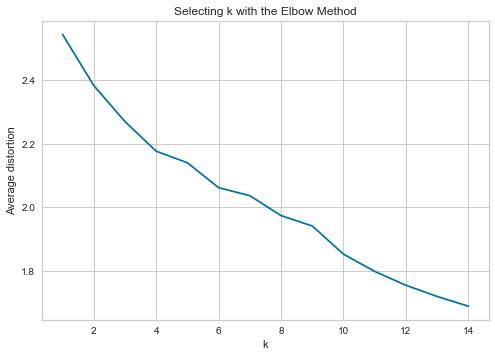

<IPython.core.display.Javascript object>

In [39]:
# creating ten possible values for k and calling it clusters
clusters = range(1, 15)
# creating a list and calling it meanDistortions
meanDistortions = []

# looping through all ten clusters to find appropriate value of k
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(df_Scaled)
    prediction = model.predict(df_Scaled)
    distortion = (
        sum(np.min(cdist(df_Scaled, model.cluster_centers_, "euclidean"), axis=1))
        / df_Scaled.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

# plotting the Elbow curve to select the appropriate value for k
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

- **Appropriate value for k seems to be 3 or 4.**

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4623841900167334)
For n_clusters = 4, the silhouette score is 0.4579748748825155)
For n_clusters = 5, the silhouette score is 0.42159822272066577)
For n_clusters = 6, the silhouette score is 0.4105617151682673)
For n_clusters = 7, the silhouette score is 0.38023548094454995)
For n_clusters = 8, the silhouette score is 0.42268860096909927)
For n_clusters = 9, the silhouette score is 0.4199509372476413)
For n_clusters = 10, the silhouette score is 0.1288721007541443)
For n_clusters = 11, the silhouette score is 0.15372350634720763)
For n_clusters = 12, the silhouette score is 0.1097518658207798)
For n_clusters = 13, the silhouette score is 0.16840908190178314)
For n_clusters = 14, the silhouette score is 0.1632832597675862)


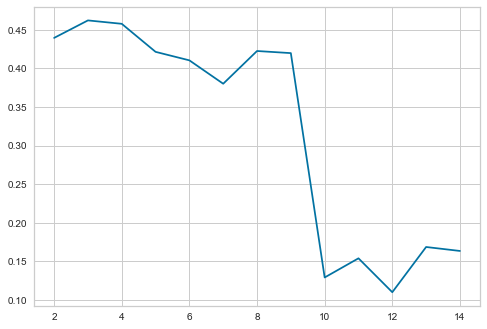

<IPython.core.display.Javascript object>

In [40]:
# checking the silhouette scores
sil_score = []
cluster_list = list(range(2, 15))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((df_Scaled))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(df_Scaled, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

# plotting the silhouette scores
plt.plot(cluster_list, sil_score)
plt.show()

- **Silhouette score for 3 is higher than that for 4 or 6. So, we will choose 3 as value of k.**

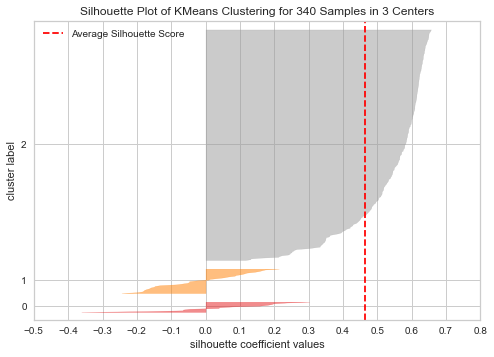

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [41]:
# Plot of clusters with silhouette coefficients using k of 3
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(df_Scaled)
visualizer.show()

In [42]:
# using three as the number of clusters for kmeans
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(df_Scaled)

KMeans(n_clusters=3, random_state=1)

<IPython.core.display.Javascript object>

In [43]:
# adding kmeans cluster labels to the original and scaled dataframes
data["K_means_Clusters"] = kmeans.labels_
df_Scaled["K_means_Clusters"] = kmeans.labels_

<IPython.core.display.Javascript object>

### Cluster Profiling

In [44]:
# find the mean of each column and groupby K_means_Clusters
cluster_profile = data.groupby("K_means_Clusters").mean()

<IPython.core.display.Javascript object>

In [45]:
# find the count in each cluster and add column in dataframe
cluster_profile["K_means_Cluster_count"] = (
    data.groupby("K_means_Clusters")["Security"].count().values
)

<IPython.core.display.Javascript object>

In [46]:
# displaying the cluster profiles
cluster_profile.style.highlight_max(color="yellow", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_Cluster_count
K_means_Clusters,,,,,,,,,,,,
0,52.142857,6.779993,1.175153,26.142857,140.142857,760285714.285714,13368785714.285715,3.769286,3838879870.871428,20.654832,-3.529270,14
1,64.183438,-10.557046,2.797776,96.531250,70.718750,159171125.000000,-3250005968.750000,-7.886875,526459323.057500,111.333230,1.783445,32
2,84.045331,5.542488,1.404255,34.040816,66.608844,10698350.340136,1445333183.673469,3.890051,427206184.715408,24.613743,-2.013147,294


<IPython.core.display.Javascript object>

In [47]:
# Showing count in each Sector that makes up the K_means_Clusters
data.groupby(["K_means_Clusters", "GICS Sector"])["Security"].count()

K_means_Clusters  GICS Sector                
0                 Consumer Discretionary          1
                  Consumer Staples                1
                  Energy                          1
                  Financials                      4
                  Health Care                     3
                  Information Technology          2
                  Telecommunications Services     2
1                 Consumer Discretionary          2
                  Energy                         23
                  Health Care                     1
                  Industrials                     1
                  Information Technology          4
                  Materials                       1
2                 Consumer Discretionary         37
                  Consumer Staples               18
                  Energy                          6
                  Financials                     45
                  Health Care                    36
                  

<IPython.core.display.Javascript object>

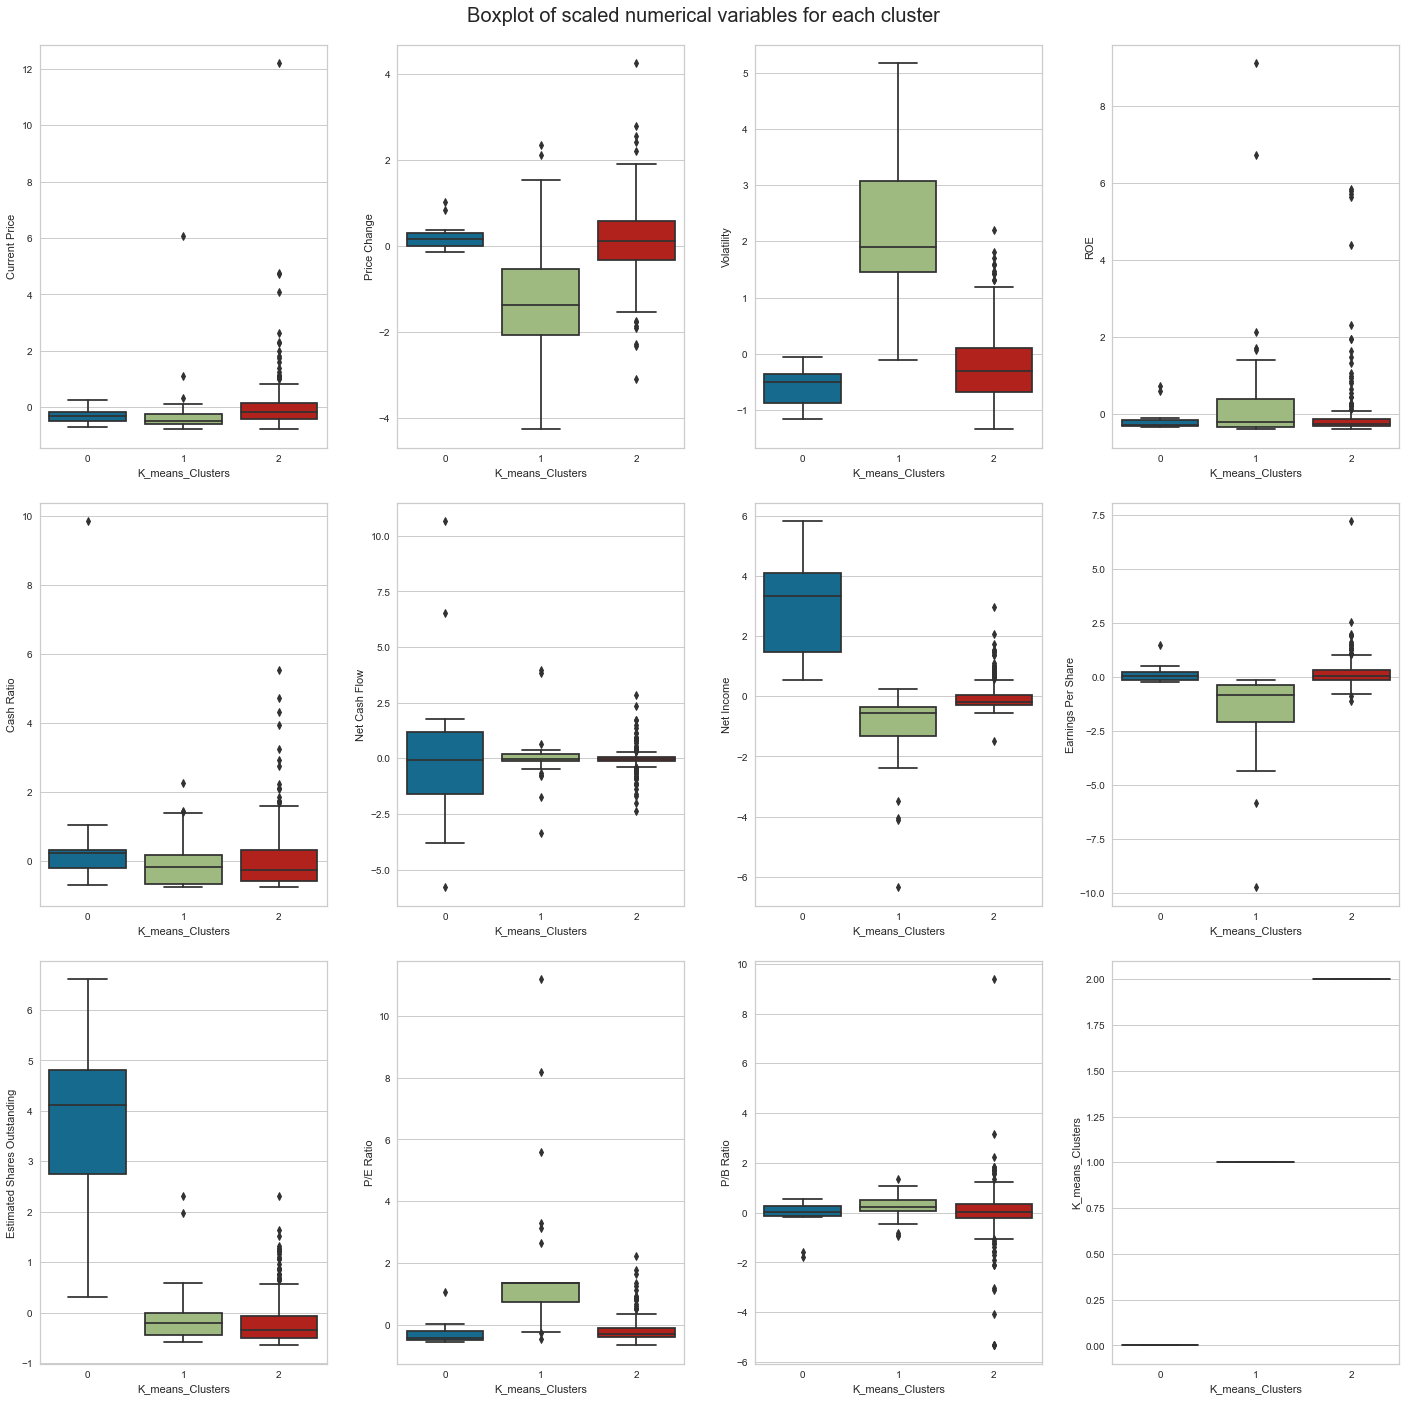

<IPython.core.display.Javascript object>

In [48]:
# creating boxplot for the scaled variables in each cluster
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)

# selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df_Scaled, x="K_means_Clusters", y=variable)

fig.tight_layout(pad=2.0)

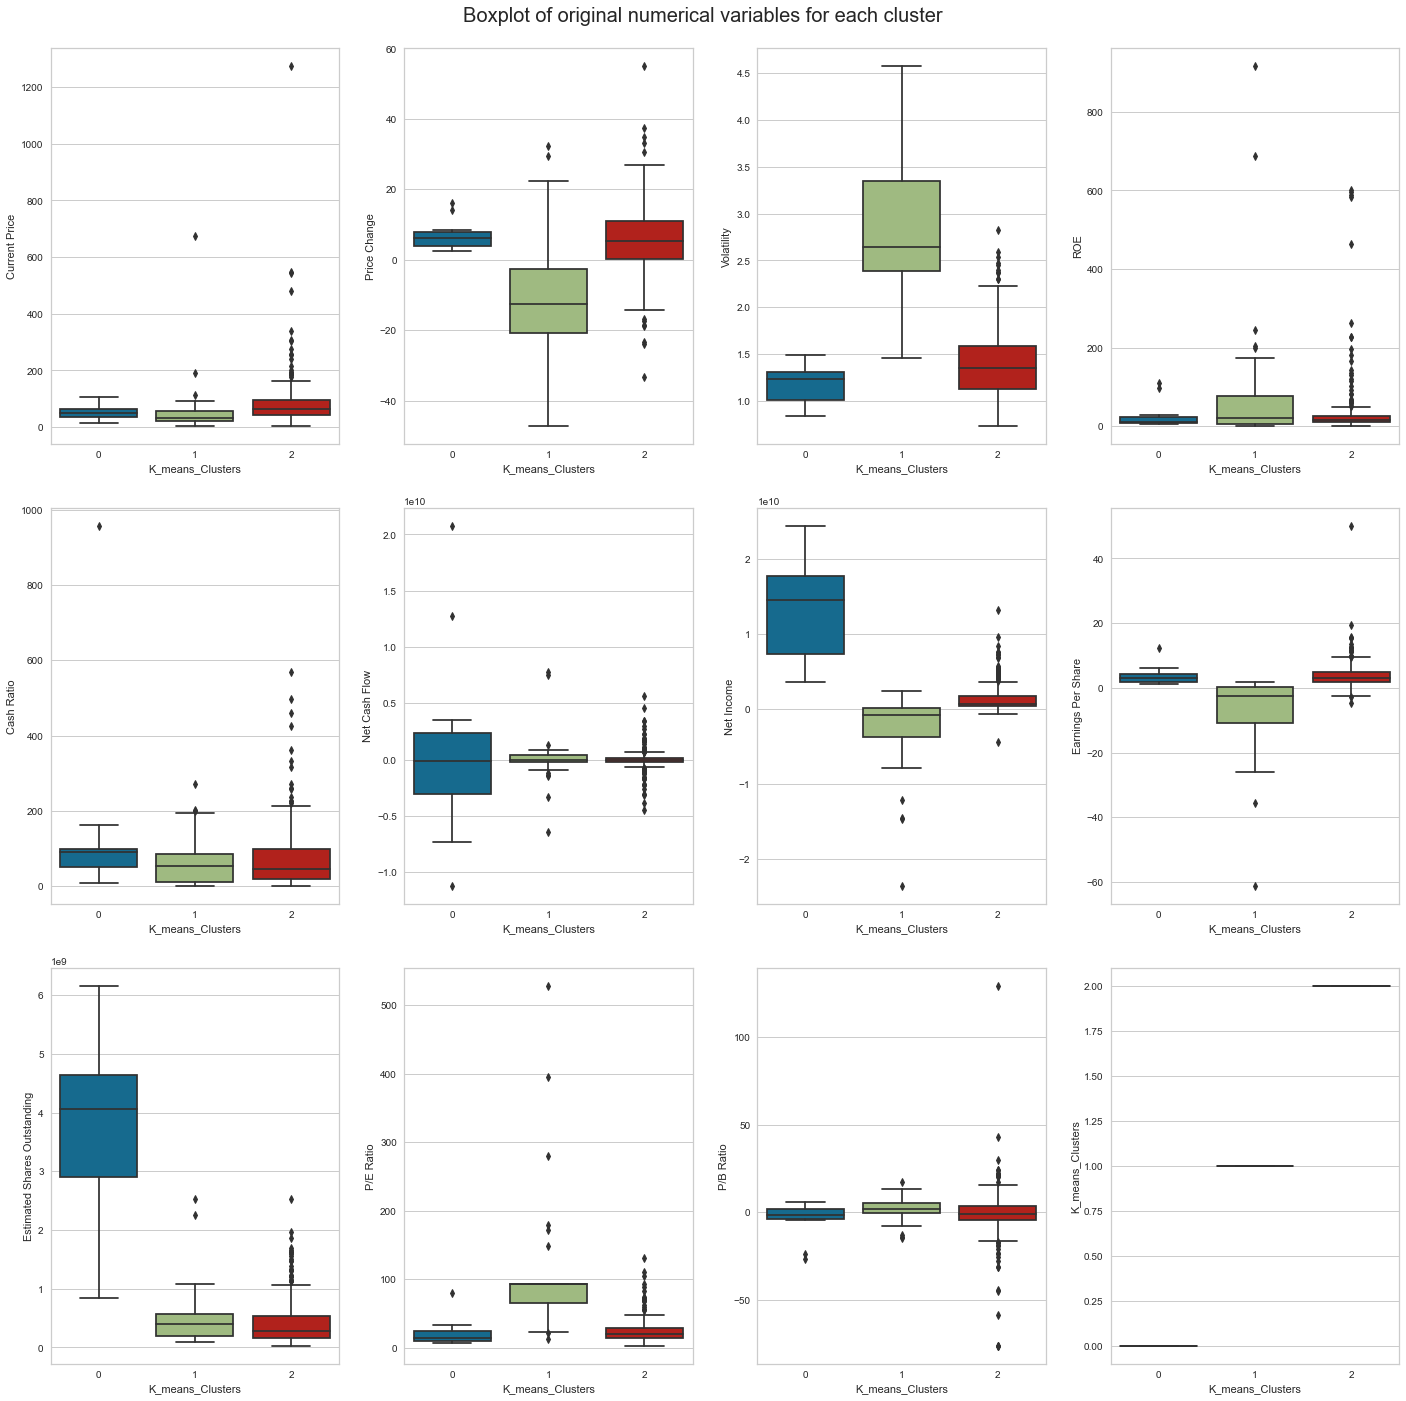

<IPython.core.display.Javascript object>

In [49]:
# creating a boxplot for the original variables in each cluster
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=data, x="K_means_Clusters", y=variable)

fig.tight_layout(pad=2.0)

### Insights:

- **Cluster 0**:
    - High Volatility, ROE, P/E Ratio, and P/B Ratio
    - Negitive Price Change, Net Income, and Earnings Per Share
    - Energy Sector makes up the majority of this cluster
    - Risky Stocks, but potential high return on investment
   
- **Cluster 1**:
    - High Current Price and Earnings Per Share
    - Largest cluster with 294 Stocks out of 340
    - Industrials and large companies makes up the majority of this cluster
    - Great Stocks for high quarterly earnings
    
- **Cluster 2**:
    - High Price Change, Cash Ratio, Net Cash Flow, Net Income, and Estimated Shares Outstanding
    - Health Care and Financials makes up the majority of this cluster
    - There is 14 Stocks in this cluster
    - These are the greatest Performing Stocks

## Hierarchical Clustering

In [50]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(df_Scaled, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(df_Scaled))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9219608374290522.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7695812755283941.
Cophenetic correlation for Euclidean distance and average linkage is 0.9397054087181529.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8608025995154562.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9084563613785143.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.7996555690058426.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9309078741806167.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8990736029552686.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9267477116438964.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.8055204267399702.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9284535798620165.
Cophenetic co

<IPython.core.display.Javascript object>

### Observations:

- **We see that the best Cophenetic correlation is the Euclidean distance with average linkage at 0.943122819163327**

In [51]:
# list of different linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# Checking cophenetic correlation for each linkage method
high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(df_Scaled, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(df_Scaled))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9219608374290522.
Cophenetic correlation for complete linkage is 0.7695812755283941.
Cophenetic correlation for average linkage is 0.9397054087181529.
Cophenetic correlation for centroid linkage is 0.9383051679305676.
Cophenetic correlation for ward linkage is 0.7233507906095931.
Cophenetic correlation for weighted linkage is 0.8608025995154562.


<IPython.core.display.Javascript object>

In [52]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9397054087181529, which is obtained with average linkage.


<IPython.core.display.Javascript object>

### Observations:

- **We see that the best Cophenetic correlation is the Euclidean distance with average linkage at 0.943122819163327**

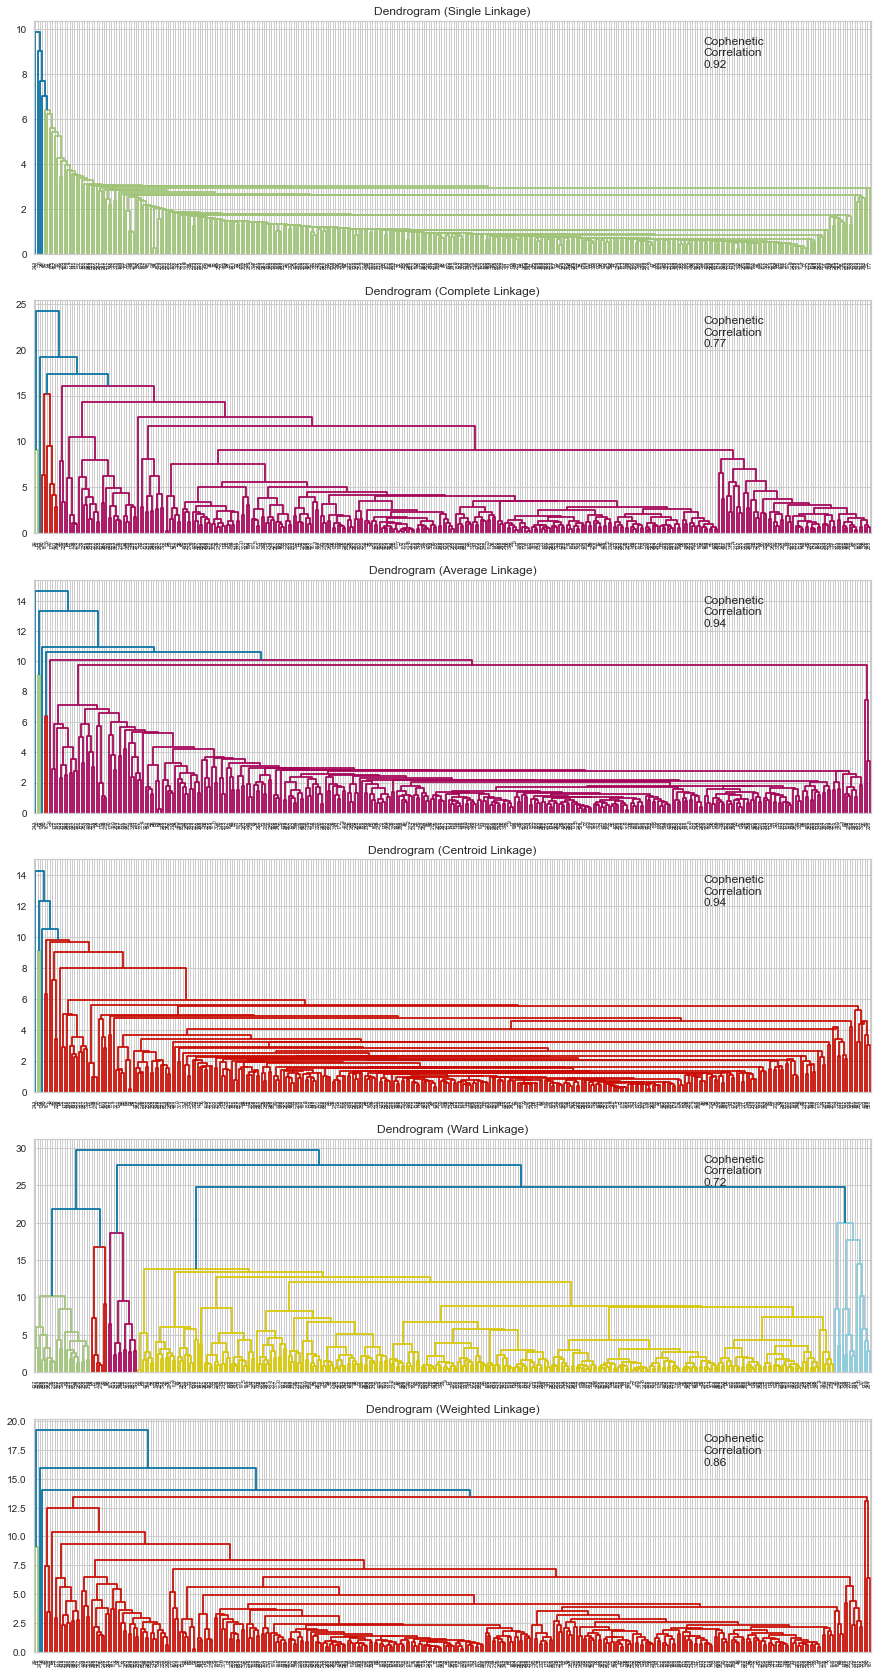

<IPython.core.display.Javascript object>

In [53]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(df_Scaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(df_Scaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

### Observations:

- **3 would be the appropriate number of the clusters as shown from the dendrograms above** 

In [54]:
# creating a model with a cluster of three
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
HCmodel.fit(df_Scaled)

AgglomerativeClustering(n_clusters=3)

<IPython.core.display.Javascript object>

In [55]:
# adding hierarchical cluster labels to the original and scaled dataframes
df_Scaled["HC_Clusters"] = HCmodel.labels_
data["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

### Cluster Profiling

In [56]:
# find the mean of each column and groupby HC_Clusters
cluster_profile2 = data.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [57]:
# find the count in each cluster and add column in dataframe
cluster_profile2["HC_Cluster_count"] = (
    data.groupby("HC_Clusters")["Security"].count().values
)

<IPython.core.display.Javascript object>

In [58]:
# displaying the cluster profiles
cluster_profile2.style.highlight_max(color="yellow", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_Clusters,HC_Cluster_count
HC_Clusters,,,,,,,,,,,,,
0,85.760460,5.549806,1.433299,25.144295,73.063758,87576124.161074,1499003476.510067,3.877131,444309611.302785,29.181962,-1.568211,1.959732,298
1,47.081001,-11.442082,2.602381,190.333333,39.300000,-481429800.000000,-3466609033.333333,-8.347000,476856000.764667,73.031755,-1.947472,1.200000,30
2,43.679166,6.333860,1.136456,21.666667,71.333333,602333333.333333,13782166666.666666,3.257500,4123307553.766666,16.757853,-4.871141,0.000000,12


<IPython.core.display.Javascript object>

In [59]:
# Showing count in each Sector that makes up the K_means_Clusters
data.groupby(["HC_Clusters", "GICS Sector"])["Security"].count()

HC_Clusters  GICS Sector                
0            Consumer Discretionary         38
             Consumer Staples               16
             Energy                          7
             Financials                     44
             Health Care                    38
             Industrials                    51
             Information Technology         31
             Materials                      19
             Real Estate                    27
             Telecommunications Services     3
             Utilities                      24
1            Consumer Discretionary          1
             Consumer Staples                2
             Energy                         22
             Financials                      1
             Industrials                     2
             Information Technology          1
             Materials                       1
2            Consumer Discretionary          1
             Consumer Staples                1
             Energy

<IPython.core.display.Javascript object>

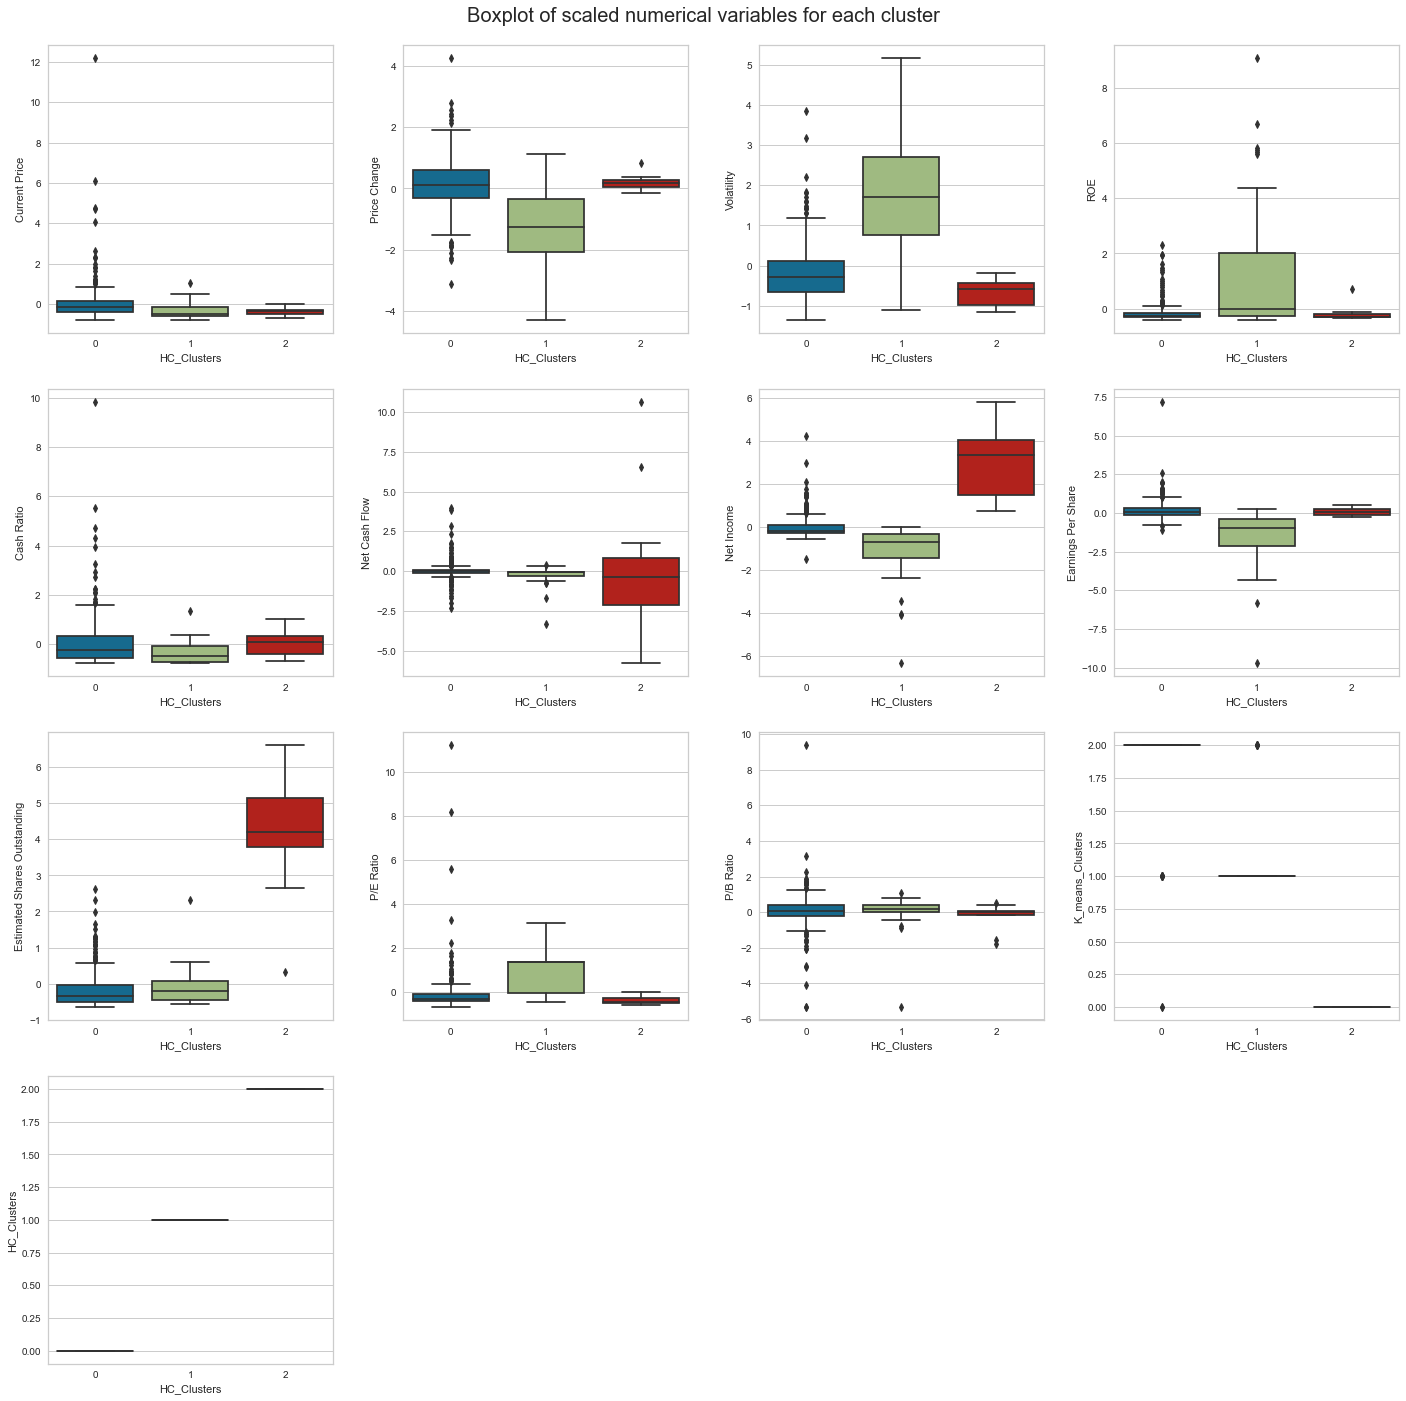

<IPython.core.display.Javascript object>

In [60]:
# creating boxplot for the scaled variables in each cluster
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)

# selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df_Scaled, x="HC_Clusters", y=variable)

# Removing extra plots
for i in range(1, 4):
    axes[3, i].set_axis_off()

fig.tight_layout(pad=2.0)

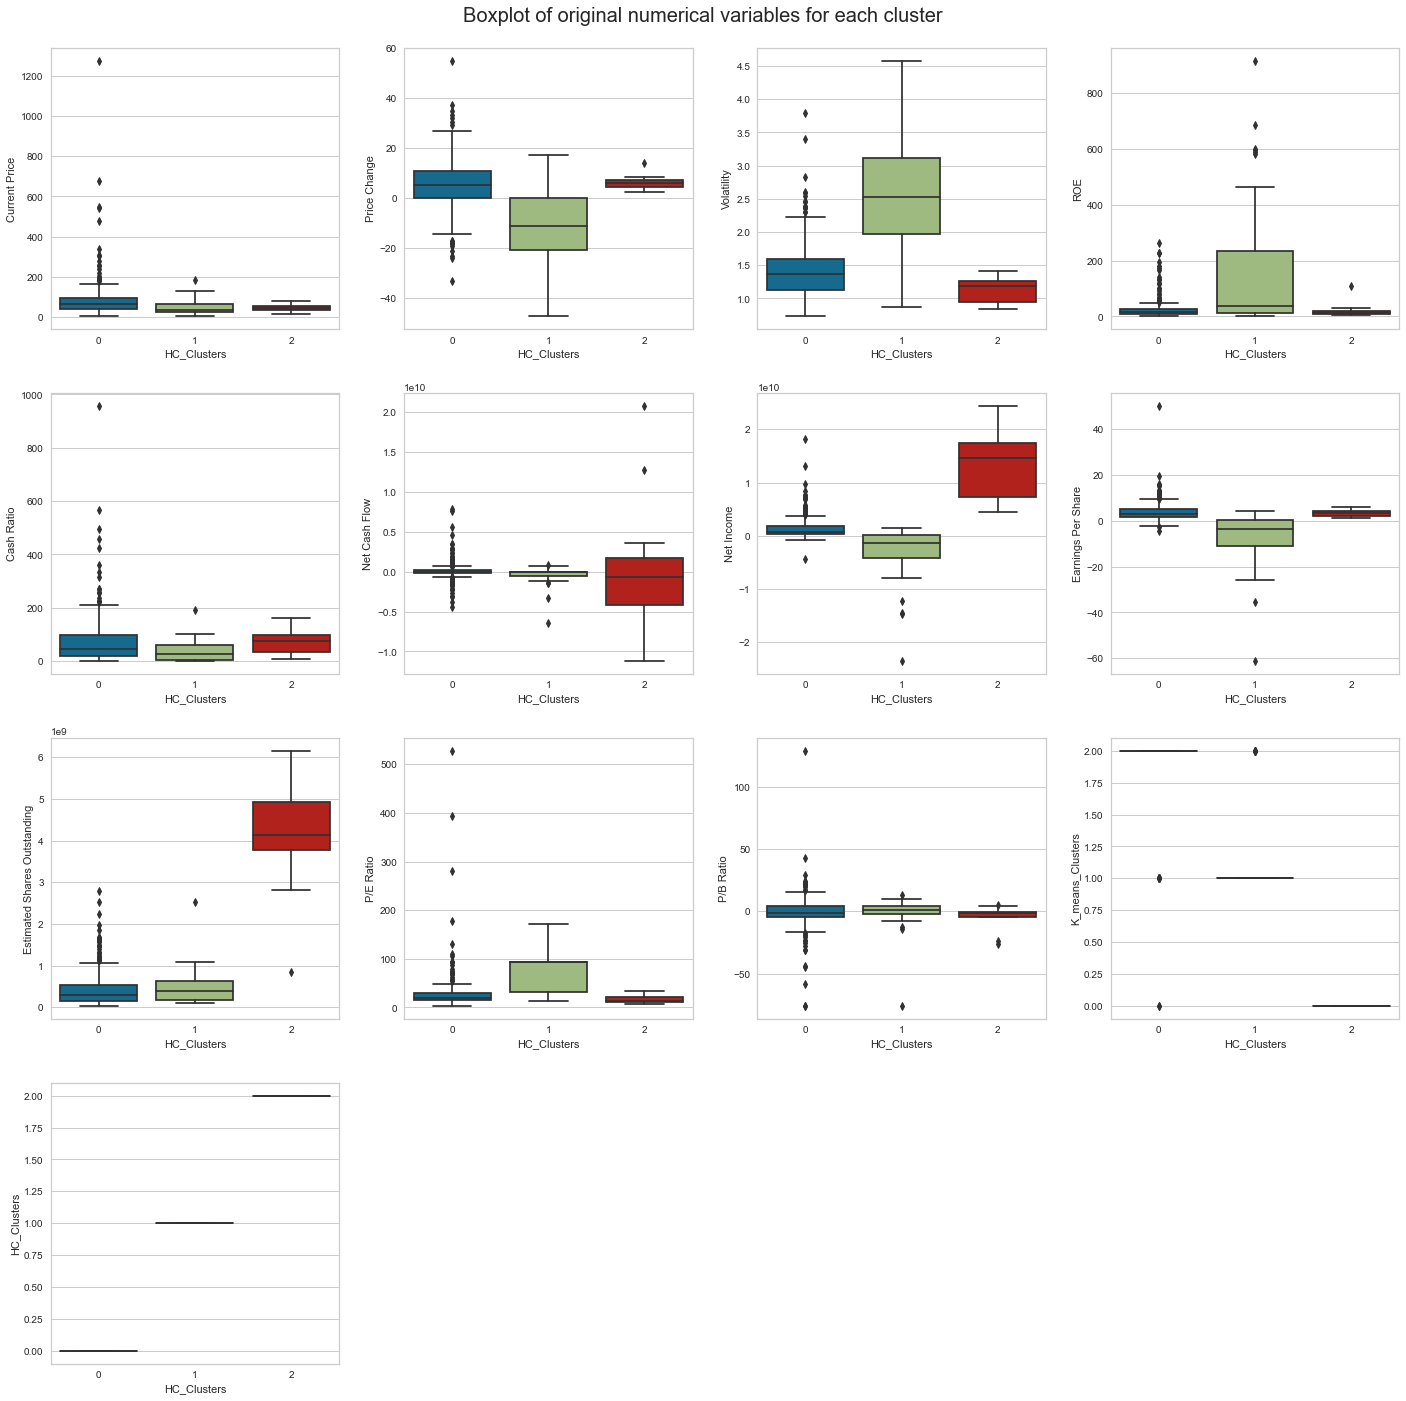

<IPython.core.display.Javascript object>

In [61]:
# creating a boxplot for the original variables in each cluster
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_col):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=data, x="HC_Clusters", y=variable)

# Removing extra plots
for i in range(1, 4):
    axes[3, i].set_axis_off()

fig.tight_layout(pad=2.0)

### Insights:

- **Cluster 0**:
    - High Current Price, Cash Ratio, Earnings Per Share, and P/B Ratio
    - Largest cluster with 298 Stocks out of 340
    - Industrials and large companies makes up the majority of this cluster
    - Great Stocks for high quarterly earnings
  
- **Cluster 1**:
    - High Volatility, ROE, and P/E Ratio
    - Negitive Price Change, Net Cash Flow, Net Income, and Earnings Per Share
    - Energy Sector makes up the majority of this cluster
    - Risky Stocks, but potential high return on investment
    
- **Cluster 2**:
    - High Price Change, Net Cash Flow, Net Income, and Estimated Shares Outstanding
    - Financials makes up the majority of this cluster
    - There is 12 Stocks in this cluster
    - These are the greatest Performing Stocks

## K-means vs Hierarchical Clustering

- The K-means clustering technique took less time to execute than the Hierarchical clustering did.
- Both K-means and Hierarchical clustering methods produced similar results with about the same groupings.
- Both K-means and Hierarchical clustering methods had three as the appropriate number of clusters.
- Biggest difference between K-means and Hierarchical clustering methods was what group higher Cash Flow and P/B Ratio was in.

- Group A:
    - K-means:  32 stocks
    - Hierarchical:  30 stocks
- Group B:
    - K-means:  294 stocks
    - Hierarchical:  298 stocks
- Group C:
    - K-means:  14 stocks
    - Hierarchical:  12 stocks

## Actionable Insights and Recommendations

- Both K-means and Hierarchical clustering methods produced similar results:


- **Group A:**
    - High Volatility, ROE, and P/E Ratio
    - Negitive Price Change, Net Income, and Earnings Per Share
    - Energy Sector makes up the majority of this cluster
    - Risky Stocks, but potential high return on investment
- **Group B:**
    - High Current Price and Earnings Per Share
    - Largest Group of stocks compared to both Group A or Group C
    - Industrials and large companies makes up the majority of this cluster
    - Great Stocks for high quarterly earnings
- **Group C:**
    - High Price Change, Net Cash Flow, Net Income, and Estimated Shares Outstanding
    - Financials and Health Care makes up the majority of this cluster
    - This is the smallest group of stocks than any other group
    - These are the greatest Performing Stocks
    
    
- The stock market is very right skewed with Median stock price of 59.71, Mean of 80.86, and max stock price at 1,274.95 in this dataset
- The stocks of the Health Care sector have seen the maximum price increase on average (Avg Price Change = 9.6)
- Majority of the stocks (30%) are in Industrials and Financials
- The worst stock sector right now is Energy (Avg Price Change = -10.2)
- The largest Volatility is in the Energy Sector (The Sector also has the highest negitive price change)
- Information Technology Sector has the largest Cash Ratio over any other Sector (Avg Cash Ratio = 149.82)
- Energy Sector has the largest P/E Ratio over any other Sector (Avg P/E Ratio = 72.90)
- I recommend the firm to hold a well-diversified portfolio as this can help increase your returns over time
- Investing is about building wealth over the long term, so it's important to avoid a short-term trading mentality and to continue to invest over time
- The firm should avoid short-term trading and invest in the stock market only if they can keep the money invested for at least three to five years
- Short-terms investments should probably be invested in low-risk high-yield savings account or a high-yield CD
- Investing in stocks also offers another nice tax advantage for long-term investors